In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import csv
import random
import operator
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [3]:
split = 0.2
df=pd.read_csv('admission_data.csv')
target_mean=df['Chance of Admit '].mean()
target_min=df['Chance of Admit '].min()
target_max=df['Chance of Admit '].max()
#df=(df-df.mean())/(df.max()-df.min())
## denormalize predicted value ----> (normalized)*(max(x)-min(x))+mean(x)
Xdf=df[df.columns[[1,2,3,4,5,6,7]]]
print(type(Xdf))
ydf=df[df.columns[8]]
X=Xdf.values
X=(X-X.mean())/(X.max()-X.min())
y=ydf.values
#print(df.mean())
#print(df.max())
#print(df['CGPA'].mean())
#X=np.array([X])
#y=np.array([y])
print(y)

<class 'pandas.core.frame.DataFrame'>
[0.65 0.71 0.8  0.91 0.74 0.65 0.78 0.78 0.75 0.49 0.8  0.92 0.65 0.79
 0.96 0.74 0.9  0.78 0.52 0.51 0.54 0.64 0.53 0.68 0.84 0.52 0.52 0.71
 0.94 0.92 0.77 0.61 0.67 0.79 0.82 0.39 0.6  0.64 0.7  0.64 0.76 0.93
 0.5  0.71 0.64 0.34 0.97 0.79 0.71 0.76 0.64 0.63 0.95 0.71 0.79 0.56
 0.56 0.64 0.72 0.9  0.71 0.91 0.7  0.87 0.71 0.89 0.78 0.93 0.58 0.79
 0.82 0.93 0.77 0.56 0.72 0.91 0.69 0.7  0.84 0.69 0.93 0.74 0.64 0.76
 0.97 0.89 0.64 0.54 0.78 0.8  0.85 0.9  0.64 0.79 0.94 0.97 0.92 0.86
 0.77 0.44 0.81 0.96 0.78 0.44 0.38 0.93 0.46 0.72 0.87 0.64 0.82 0.89
 0.59 0.66 0.63 0.58 0.75 0.42 0.64 0.91 0.89 0.61 0.63 0.92 0.7  0.84
 0.9  0.62 0.67 0.7  0.49 0.56 0.57 0.49 0.88 0.88 0.64 0.47 0.78 0.61
 0.82 0.73 0.72 0.61 0.68 0.71 0.76 0.43 0.86 0.62 0.67 0.54 0.74 0.62
 0.79 0.54 0.65 0.72 0.93 0.71 0.74 0.91 0.58 0.87 0.74 0.81 0.89 0.71
 0.7  0.85 0.79 0.46 0.67 0.74 0.66 0.58 0.57 0.62 0.69 0.57 0.48 0.81
 0.86 0.68 0.89 0.77 0.61 0.79 0.52 0.5

In [4]:
#train_df,validation_df = divide(df,validation_data_size=0.2)
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=5)

In [5]:
y_valid[0]

0.65

In [6]:
X_train.shape

(360, 7)

In [7]:
X_train=X_train.T
X_train.shape[0]

7

In [8]:
y_train.shape

(360,)

In [9]:
y_train=np.array([y_train])
y_train.shape

(1, 360)

In [10]:
X_valid=X_valid.T
X_valid.shape

(7, 90)

In [11]:
y_valid=np.array([y_valid])
y_valid.shape

(1, 90)

In [12]:
def init_parameters(lenw):
    w=np.random.randn(1,lenw)
    #w=np.zeros(1,lenw)
    #print("shape of theta vector:",w.shape)
    b=0
    return w,b
    

In [1]:
def get_prediction(X,w,b):
    z=np.dot(w,X)+b # z-->1xm
    return(z)

In [21]:
def cost_function(z,y):
    m= y.shape[1]
    #print('m type:',type(m))
    #print('m type:',type(z))
    #print('m type:',type(y))
    
    #mean square error
    J = (1/(2*m))*np.sum(np.square(z-y))
    #mean absolute error
    #J = (1/(2*m))*np.sum(np.absolute(z-y))
    #mean absolute percentage error
    #J = (100/(2*m))*np.sum(np.absolute((z-y)/z))
    return J

In [22]:
def get_partial_derivative_terms(X,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)
    db=np.sum(dz)
    return dw,db

In [23]:
def gradient_descent_update(w,b,dw,db,alpha):
    w=w-alpha*dw
    b=b-alpha*db
    return w,b

In [24]:
def linear_regression(X_train,y_train,alpha,iterations):
    lenw=X_train.shape[0]
    w,b=init_parameters(lenw)
    m_train=y_train.shape[1]
    m_valid=y_valid.shape[1]
    costs_train=[]
    for i in range(iterations+1):
        z_train=get_prediction(X_train,w,b)
        cost_train=cost_function(z_train,y_train)
        dw,db=get_partial_derivative_terms(X_train,y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,alpha)
        print(w.shape)
        
        theta_vector=np.copy(w)
        c_value=b
        #store training_cost in list
        if i%10==0:
            costs_train.append(cost_train)
        # Mean Absolute Error
        mae_train=(1/m_train)*np.sum(np.abs(z_train-y_train))
        
        #cost_val ,mae_val on validation data
        #z_valid=get_prediction(X_valid,w,b)
        #cost_valid=cost_function(z_valid,y_valid)
        #mae_valid=(1/m_valid)*np.sum(np.abs(z_valid-y_valid))
        print('Iteration:',i)
        print('Training cost:',cost_train)
        #print('validation cost:',cost_valid)
        print('Training MAE:',mae_train)
        #print('Validation MAE:',mae_valid)
        print('------------------------------')
    mlt.plot(costs_train)
    mlt.xlabel('Iterations (In 10s)')
    mlt.ylabel('Training cost')
    mlt.title('Learning rate'+str(alpha))
    mlt.show()
    return w,b
    

(1, 7)
Iteration: 0
Training cost: 0.06995859785937357
Training MAE: 0.339435854236182
------------------------------
(1, 7)
Iteration: 1
Training cost: 0.06226689375218698
Training MAE: 0.3172044414608745
------------------------------
(1, 7)
Iteration: 2
Training cost: 0.05560074728884222
Training MAE: 0.2967429232670478
------------------------------
(1, 7)
Iteration: 3
Training cost: 0.04982340464461554
Training MAE: 0.2781933754820741
------------------------------
(1, 7)
Iteration: 4
Training cost: 0.04481634754669029
Training MAE: 0.2615191056926635
------------------------------
(1, 7)
Iteration: 5
Training cost: 0.040476861639400105
Training MAE: 0.2463438962060295
------------------------------
(1, 7)
Iteration: 6
Training cost: 0.03671592909782015
Training MAE: 0.23297591968150697
------------------------------
(1, 7)
Iteration: 7
Training cost: 0.03345640225254289
Training MAE: 0.22092562919501246
------------------------------
(1, 7)
Iteration: 8
Training cost: 0.030631420

Training MAE: 0.12523917757984532
------------------------------
(1, 7)
Iteration: 360
Training cost: 0.01201811379254501
Training MAE: 0.12523520008913075
------------------------------
(1, 7)
Iteration: 361
Training cost: 0.01201739176885128
Training MAE: 0.12523122275603146
------------------------------
(1, 7)
Iteration: 362
Training cost: 0.012016669802333131
Training MAE: 0.1252272455805412
------------------------------
(1, 7)
Iteration: 363
Training cost: 0.012015947892986014
Training MAE: 0.12522326856265364
------------------------------
(1, 7)
Iteration: 364
Training cost: 0.012015226040805392
Training MAE: 0.12521929170236262
------------------------------
(1, 7)
Iteration: 365
Training cost: 0.012014504245786725
Training MAE: 0.1252153149996618
------------------------------
(1, 7)
Iteration: 366
Training cost: 0.012013782507925464
Training MAE: 0.12521133845454493
------------------------------
(1, 7)
Iteration: 367
Training cost: 0.012013060827217068
Training MAE: 0.1252

(1, 7)
Iteration: 653
Training cost: 0.011808987961471742
Training MAE: 0.12407681576267299
------------------------------
(1, 7)
Iteration: 654
Training cost: 0.011808282497342558
Training MAE: 0.12407289093032207
------------------------------
(1, 7)
Iteration: 655
Training cost: 0.011807577089072978
Training MAE: 0.12406896625350046
------------------------------
(1, 7)
Iteration: 656
Training cost: 0.011806871736658566
Training MAE: 0.12406504173220201
------------------------------
(1, 7)
Iteration: 657
Training cost: 0.011806166440094886
Training MAE: 0.12406111736642049
------------------------------
(1, 7)
Iteration: 658
Training cost: 0.01180546119937749
Training MAE: 0.12405719315614978
------------------------------
(1, 7)
Iteration: 659
Training cost: 0.01180475601450195
Training MAE: 0.12405326910138365
------------------------------
(1, 7)
Iteration: 660
Training cost: 0.011804050885463825
Training MAE: 0.12404934520211597
------------------------------
(1, 7)
Iteration: 

(1, 7)
Iteration: 951
Training cost: 0.011601212336821735
Training MAE: 0.12291970597556616
------------------------------
(1, 7)
Iteration: 952
Training cost: 0.01160052332394356
Training MAE: 0.12291585113430098
------------------------------
(1, 7)
Iteration: 953
Training cost: 0.011599834365617628
Training MAE: 0.12291199644575596
------------------------------
(1, 7)
Iteration: 954
Training cost: 0.011599145461839615
Training MAE: 0.12290814190992504
------------------------------
(1, 7)
Iteration: 955
Training cost: 0.011598456612605178
Training MAE: 0.12290428752680214
------------------------------
(1, 7)
Iteration: 956
Training cost: 0.011597767817909985
Training MAE: 0.12290043329638115
------------------------------
(1, 7)
Iteration: 957
Training cost: 0.011597079077749697
Training MAE: 0.12289657921865603
------------------------------
(1, 7)
Iteration: 958
Training cost: 0.01159639039211999
Training MAE: 0.12289272529362073
------------------------------
(1, 7)
Iteration: 

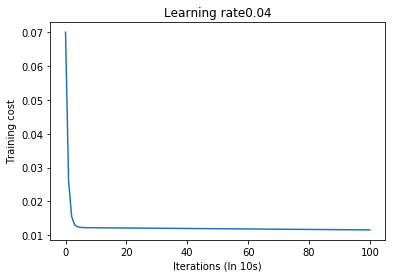

In [33]:
theta_vector,c_value=linear_regression(X_train,y_train,0.04,1000)

In [34]:
print(theta_vector)
print(c_value)

[[ 0.65695837 -1.89213791  1.39673588 -1.58503464 -0.46903853 -0.41112501
  -0.97834352]]
0.12137238304629482


In [36]:
z_valid=get_prediction(X_valid,theta_vector,c_value)
cost_valid=cost_function(z_valid,y_valid)
print(cost_valid)
#print(cost_valid)
#print(df['Chance of Admit '].max())
#print(df['Chance of Admit '].min())
#print(df['Chance of Admit '].mean())
print(type(y_valid))
for i in range(len(z_valid[0])):
    print ('predicted',z_valid[0][i])
    print('actual',y_valid[0][i])
    print('-----------')

    


0.012571746092009761
<class 'numpy.ndarray'>
predicted 0.7647273163593516
actual 0.65
-----------
predicted 0.731649844261213
actual 0.76
-----------
predicted 0.7252139383108629
actual 0.52
-----------
predicted 0.6810646765962687
actual 0.71
-----------
predicted 0.7266643333410655
actual 0.76
-----------
predicted 0.706207076740618
actual 0.91
-----------
predicted 0.7573123379065357
actual 0.79
-----------
predicted 0.7155410980645399
actual 0.89
-----------
predicted 0.7131604132297521
actual 0.63
-----------
predicted 0.7103314337413519
actual 0.93
-----------
predicted 0.713543387699641
actual 0.91
-----------
predicted 0.7457590029712838
actual 0.7
-----------
predicted 0.7053942270041503
actual 0.71
-----------
predicted 0.7105237146323063
actual 0.93
-----------
predicted 0.7471459352920068
actual 0.48
-----------
predicted 0.7232272800956694
actual 0.82
-----------
predicted 0.7012906904844173
actual 0.87
-----------
predicted 0.7518895288921411
actual 0.68
-----------
predi

In [40]:
from sklearn import linear_model as lm

In [41]:
lg=lm.LinearRegression()
model=lg.fit(X_train.T,y_train.T)
predictions=lg.predict(X_valid.T)
mean_square_val_with_model=(1/y_valid.shape[1])*np.sum(np.square((predictions-y_valid.T)))
print(mean_square_val_with_model)

0.00548871503317814


In [42]:
predictions

array([[0.5931342 ],
       [0.76636613],
       [0.75665347],
       [0.70854711],
       [0.73320831],
       [0.90966871],
       [0.77147114],
       [0.90452729],
       [0.73967237],
       [0.91421821],
       [0.93367453],
       [0.66122233],
       [0.7461218 ],
       [0.88887573],
       [0.58593687],
       [0.81037925],
       [0.84776668],
       [0.63594128],
       [0.71126538],
       [0.77620355],
       [0.72199393],
       [0.77119092],
       [0.82474404],
       [0.72522489],
       [0.88906734],
       [0.7620835 ],
       [0.59648613],
       [0.66019965],
       [0.64683865],
       [0.85791414],
       [0.6542264 ],
       [0.74331025],
       [0.87992631],
       [0.83260426],
       [0.72121272],
       [0.56279255],
       [0.56039601],
       [0.62992508],
       [0.62700499],
       [0.55009454],
       [0.51831622],
       [0.84974057],
       [0.51637143],
       [0.9618974 ],
       [0.78392172],
       [0.58615627],
       [0.85434775],
       [0.694

In [43]:
mean_square_val_with_sklearn=(1/y_valid.shape[1])*np.sum(np.square((predictions-y_valid.T)))



In [44]:
print(mean_square_val_with_sklearn)

0.00548871503317814
